In [1]:
#On Iris Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
iris
x = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [6]:
y_test

array([0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1])

In [7]:
model = DecisionTreeClassifier()

In [8]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
ypred = model.predict(x_test)

In [11]:
ypred

array([0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2,
       2, 0, 1, 0, 0, 1, 1, 1])

In [12]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.9666666666666667

Predicted labels: [0 0 0 2 1 1 2 0 2 0 0 1 0 0 1 0 0 2 0 0 1 2 2 0 1 0 0 1 1 1]
Actual labels:    [0 0 0 2 1 1 2 0 2 0 0 1 0 0 1 0 0 2 0 0 2 2 2 0 1 0 0 1 1 1]
Model Accuracy: 96.67%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94         8
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.96      0.95      0.95        30
weighted avg       0.97      0.97      0.97        30



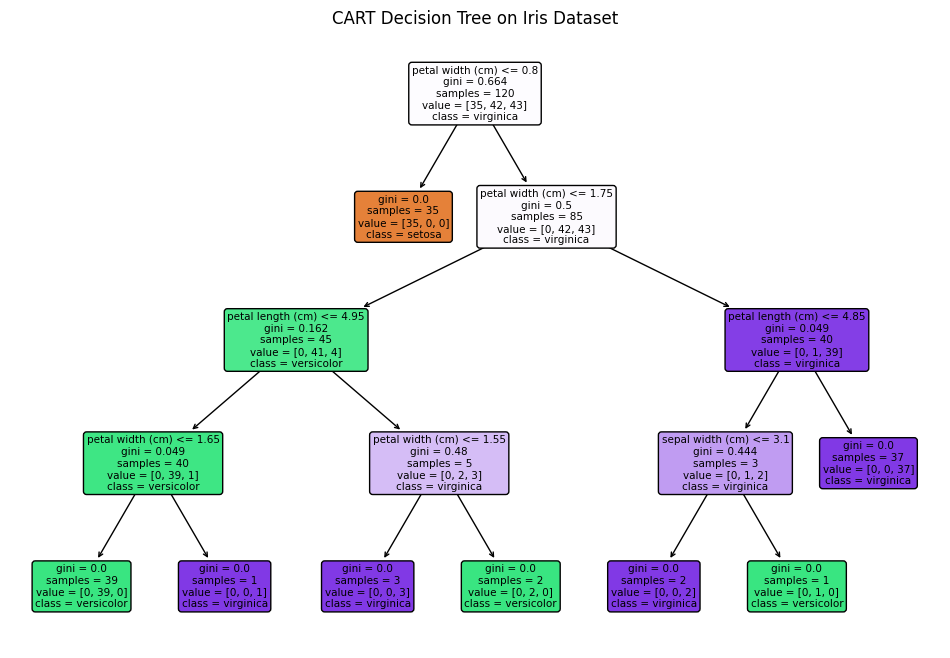

In [14]:
print("Predicted labels:", ypred)
print("Actual labels:   ", y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, ypred))

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model,
          filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          rounded=True)
plt.title("CART Decision Tree on Iris Dataset")
plt.show()

In [2]:
#OneR algorithm

import pandas as pd
# Temperature Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print(df.head())


    Outlook Temperature Humidity    Wind Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3     Rainy        Mild     High    Weak  Yes
4     Rainy        Cool   Normal    Weak  Yes


In [3]:
def oneR(df, target):
    features = df.columns.drop(target)
    min_error = float('inf')
    best_rule = None
    
    for feature in features:
        #rule
        rule = {}
        for val, subset in df.groupby(feature):
            most_common = subset[target].mode()[0]
            rule[val] = most_common
        
        predictions = df[feature].map(rule)
        errors = sum(predictions != df[target])
        error_rate = errors / len(df)
        
        if error_rate < min_error:
            min_error = error_rate
            best_rule = (feature, rule, error_rate)
    
    return best_rule


In [4]:
feature, rule, error = oneR(df, 'Play')

print(f"Best Feature: {feature}")
print("Rule:")
for val, pred in rule.items():
    print(f"  If {feature} = {val}, then Play = {pred}")
print(f"Error Rate: {error:.2f}")


Best Feature: Outlook
Rule:
  If Outlook = Overcast, then Play = Yes
  If Outlook = Rainy, then Play = Yes
  If Outlook = Sunny, then Play = No
Error Rate: 0.29


In [5]:
def predict_oneR(instance, best_rule):
    feature, rule, _ = best_rule
    return rule.get(instance[feature], "Unknown")

# Example prediction
test_instance = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong'}
prediction = predict_oneR(test_instance, (feature, rule, error))
print("Prediction for new instance:", prediction)


Prediction for new instance: No
